In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

df = pd.read_csv('stroke.csv', na_values='?')
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Question 1

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1136 non-null   int64  
 1   gender             1136 non-null   object 
 2   age                1136 non-null   int64  
 3   hypertension       1136 non-null   int64  
 4   heart_disease      1136 non-null   int64  
 5   ever_married       1136 non-null   object 
 6   work_type          1136 non-null   object 
 7   Residence_type     1136 non-null   object 
 8   avg_glucose_level  1136 non-null   float64
 9   bmi                1084 non-null   float64
 10  smoking_status     1136 non-null   object 
 11  stroke             1136 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 106.6+ KB


In [130]:
#Dropping null values
df = df.drop(['id', 'bmi'], axis=1)
df = df.dropna().copy()
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   object 
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   object 
 5   work_type          1136 non-null   object 
 6   Residence_type     1136 non-null   object 
 7   avg_glucose_level  1136 non-null   float64
 8   smoking_status     1136 non-null   object 
 9   stroke             1136 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 88.9+ KB


Question 2

In [131]:
for column in df:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: gender
Female    642
Male      494
Name: gender, dtype: int64


Column: age
79    26
57    24
78    24
52    23
55    22
      ..
46     7
6      7
22     7
12     6
4      6
Name: age, Length: 83, dtype: int64


Column: hypertension
0    1001
1     135
Name: hypertension, dtype: int64


Column: heart_disease
0    1058
1      78
Name: heart_disease, dtype: int64


Column: ever_married
Yes    769
No     367
Name: ever_married, dtype: int64


Column: work_type
Private          671
Self-employed    174
children         147
Govt_job         142
Never_worked       2
Name: work_type, dtype: int64


Column: Residence_type
Urban    587
Rural    549
Name: Residence_type, dtype: int64


Column: avg_glucose_level
92.14     3
94.92     2
203.81    2
72.09     2
76.12     2
         ..
232.81    1
100.09    1
114.76    1
77.77     1
108.61    1
Name: avg_glucose_level, Length: 1068, dtype: int64


Column: smoking_status
never smoked       416
Unknown            352
formerly smoked    204
sm

In [132]:
#It seems that due to the majority of the columns being very unbalanced in terms of data, the target variable is unbalanced.

Question 3

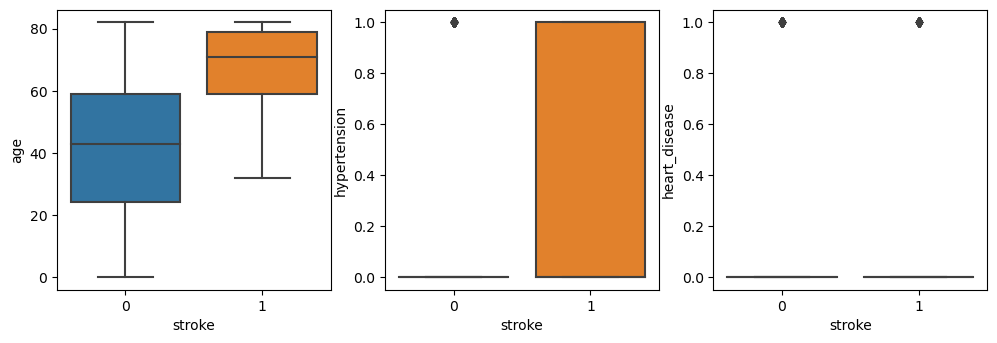

In [133]:
#Numerical Features vs. Target - Box Plot
import seaborn as sns
num_list=['age', 'hypertension', 'heart_disease']
fig=plt.figure(figsize=(12, 8))
plt.tight_layout()

for i in range(len(num_list)):
    column=num_list[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='stroke',y=column, data=df)

The biggest varience between two groups would go to the 'Age' group. The median is the farthest away from each other on both sides. The smallest would be in average glucose level. The average is very simmilar here.

Question 4

In [134]:
#Using f-score and p-values

from sklearn.feature_selection import SelectKBest, f_classif, chi2
x = df.loc[:, ['age', 'hypertension', 'heart_disease']]
y = df.loc[:, 'stroke']

fs = SelectKBest(score_func=f_classif, k='all')  
bestFeatures = fs.fit(x, y)   
np.set_printoptions(suppress = True)
print(bestFeatures.scores_)    
print(bestFeatures.pvalues_)


[185.18556526  28.42106476  52.02345962]
[0.         0.00000012 0.        ]


I beleieved 'heart_disease' should be removed, as it doesn't show a visual, however I realize now the data is simply not able to be measured numerically, and can be seen categorially.

Question 5

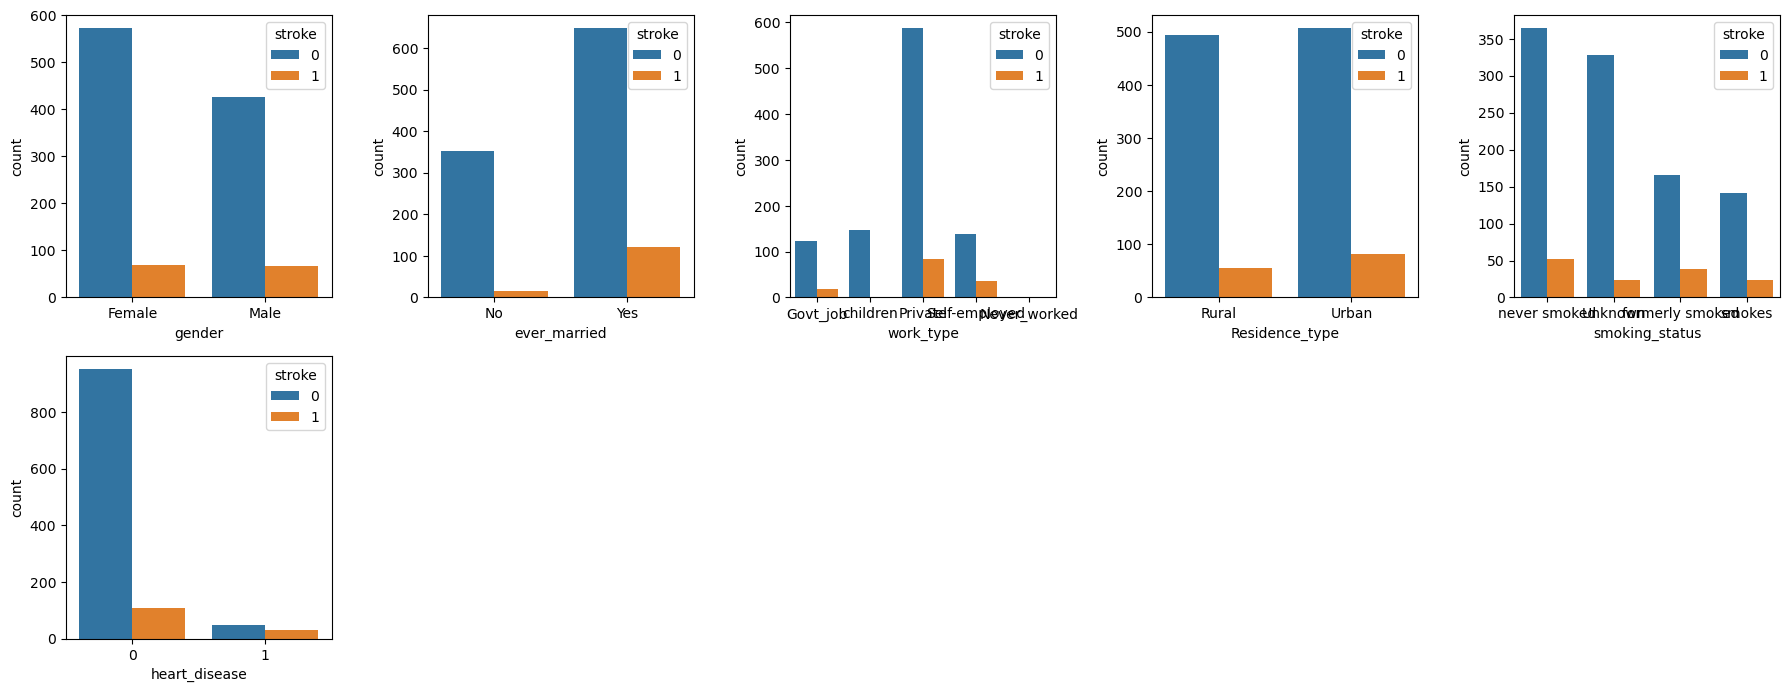

In [135]:
#Define the list of categorical columns you want to plot
fig = plt.figure(figsize=(18, 10))
i = 0
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'heart_disease']

for column in categorical_columns:
    sub = fig.add_subplot(3, 5, i + 1)
    sub.set_xlabel(column)
    sns.countplot(data=df, x=column, hue='stroke')
    i = i + 1

plt.tight_layout()
plt.show()

1. Do people of different genders have the same probability of getting stroke?  
They do. Both male and female individuals have the same possibility to get a stroke.

2. Do people with previous heart disease versas people with no heart disease have the same probability of getting stroke? 
The probability of getting a stroke is higher, and definetly not the same. 

Question 6

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             1136 non-null   object 
 1   age                1136 non-null   int64  
 2   hypertension       1136 non-null   int64  
 3   heart_disease      1136 non-null   int64  
 4   ever_married       1136 non-null   object 
 5   work_type          1136 non-null   object 
 6   Residence_type     1136 non-null   object 
 7   avg_glucose_level  1136 non-null   float64
 8   smoking_status     1136 non-null   object 
 9   stroke             1136 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 88.9+ KB


In [137]:
#We're going to change gender and resedence type to numeric types. to do so, we'll need to make our own map first for the variable to follow.
def map_categories_to_numeric(category_column, mapping):
    return category_column.map(mapping)

gender_mapping = {
    'Female': 0,
    'Male': 1,
}

residence_type_mapping = {
    'Rural': 0,
    'Urban': 1,
}

ever_married_mapping = {
    'No': 0,
    'Yes': 1,
}

work_type_mapping = {
    'Govt_job': 0,
    'children': 1,
    'Self-employed': 2,
    'Private': 3,
}

smoking_status_mapping = {
    'never smoked': 0,
    'Unknown': 1,
    'formerly smoked': 2,
    'smokes': 3,
}

#Now we'll fit these maps onto the new values
df['gender_numeric'] = map_categories_to_numeric(df['gender'], gender_mapping)
df['residence_type_numeric'] = map_categories_to_numeric(df['Residence_type'], residence_type_mapping)
df['ever_married_numeric'] = map_categories_to_numeric(df['ever_married'], ever_married_mapping)
df['work_type_numeric'] = map_categories_to_numeric(df['work_type'], work_type_mapping)
df['smoking_status_numeric'] = map_categories_to_numeric(df['smoking_status'], smoking_status_mapping)



print(df.head())



   gender  age  hypertension  heart_disease ever_married work_type  \
0  Female   31             0              0           No  Govt_job   
1  Female   13             0              0           No  children   
2    Male   18             0              0           No   Private   
3  Female   65             0              0          Yes   Private   
4    Male    4             0              0           No  children   

  Residence_type  avg_glucose_level   smoking_status  stroke  gender_numeric  \
0          Rural              70.66     never smoked       0               0   
1          Rural              85.81          Unknown       0               0   
2          Urban              60.56     never smoked       0               1   
3          Urban             205.77  formerly smoked       1               0   
4          Rural              90.42          Unknown       0               1   

   residence_type_numeric  ever_married_numeric  work_type_numeric  \
0                       0   

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1136 entries, 0 to 1135
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  1136 non-null   object 
 1   age                     1136 non-null   int64  
 2   hypertension            1136 non-null   int64  
 3   heart_disease           1136 non-null   int64  
 4   ever_married            1136 non-null   object 
 5   work_type               1136 non-null   object 
 6   Residence_type          1136 non-null   object 
 7   avg_glucose_level       1136 non-null   float64
 8   smoking_status          1136 non-null   object 
 9   stroke                  1136 non-null   int64  
 10  gender_numeric          1136 non-null   int64  
 11  residence_type_numeric  1136 non-null   int64  
 12  ever_married_numeric    1136 non-null   int64  
 13  work_type_numeric       1134 non-null   float64
 14  smoking_status_numeric  1136 non-null   

Question 7

In [139]:
#Drop columns with null values before chi squared test
df.dropna(subset=['work_type_numeric'], inplace=True)
#We are going to create a chi squared test for the category variables. 
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
x = pd.get_dummies(df[categorical_columns], drop_first=True)
y = df['stroke']

#I used what I found on the google slides to work this out
chi = SelectKBest(score_func=chi2, k='all')

#Data with chi squared test
strokeFeatures = chi.fit(x, y)

print(strokeFeatures.scores_)
print(strokeFeatures.pvalues_)


[ 1.09392143 10.36463947  0.12091755 10.57311981 20.1995988   1.67302915
  8.23067227  0.0687171   0.58306466]
[0.29560398 0.00128452 0.72804145 0.00114744 0.00000698 0.1958533
 0.00411883 0.79321392 0.44511357]


In [140]:
#Columns should be dropped for having a P value over 0.05.

df = df.drop(['gender', 'ever_married', 'work_type', 'smoking_status'], axis=1)
df.info() #recheck

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1134 entries, 0 to 1135
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     1134 non-null   int64  
 1   hypertension            1134 non-null   int64  
 2   heart_disease           1134 non-null   int64  
 3   Residence_type          1134 non-null   object 
 4   avg_glucose_level       1134 non-null   float64
 5   stroke                  1134 non-null   int64  
 6   gender_numeric          1134 non-null   int64  
 7   residence_type_numeric  1134 non-null   int64  
 8   ever_married_numeric    1134 non-null   int64  
 9   work_type_numeric       1134 non-null   float64
 10  smoking_status_numeric  1134 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 106.3+ KB


Question 8

In [142]:
#Plan to convert the category items to dummy variables
categorical_columns = ['Residence_type']

#Use Get_Dummies to convert 
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df.head())


   age  hypertension  heart_disease  avg_glucose_level  stroke  \
0   31             0              0              70.66       0   
1   13             0              0              85.81       0   
2   18             0              0              60.56       0   
3   65             0              0             205.77       1   
4    4             0              0              90.42       0   

   gender_numeric  residence_type_numeric  ever_married_numeric  \
0               0                       0                     0   
1               0                       0                     0   
2               1                       1                     0   
3               0                       1                     1   
4               1                       0                     0   

   work_type_numeric  smoking_status_numeric  Residence_type_Urban  
0                0.0                       0                     0  
1                1.0                       1                  

Question 9

In [143]:
from sklearn.model_selection import train_test_split

#Make sure y is stroke (target variable) and the x is everything but stroke
x = df.drop('stroke', axis=1)  
y = df['stroke']  

#Splitting it between 80 and 20%
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0, stratify=y)


print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (907, 10)
x_test shape: (227, 10)
y_train shape: (907,)
y_test shape: (227,)


Question 10

In [144]:
#We need to import SMOTE to use the Over Sampling method
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#Applying it to the dataset
oversampled_x, oversampled_y = os.fit_resample(x_train, y_train)


print("Original training dataset shape:", x_train.shape)
print("Oversampled training dataset shape:", oversampled_x.shape)

Original training dataset shape: (907, 10)
Oversampled training dataset shape: (1594, 10)


Question 11

In [145]:
from sklearn.metrics import accuracy_score, confusion_matrix

#Build the Logistic Regression model
logreg_model = LogisticRegression(penalty='none', max_iter=2000)
logreg_model.fit(oversampled_x, oversampled_y.values.ravel())

#Prediction for accuracy score
y_pred = logreg_model.predict(x_test)

#Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Accuracy: 0.7709251101321586
Confusion Matrix:
[[160  40]
 [ 12  15]]


C:\Users\kadel\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


THIS IS AN INDIVIDUAL ASSIGNMENT. YOU MAY NOT DISCUSS THIS ASSIGNMENT WITH ANYONE WITHIN OR OUTSIDE THE CLASS (except the instructor).

DO not discuss your approaches or your code with colleagues. There are many ways to implement this assignment, and it is extremely easy to spot code that has been inspired by someone else’s code and to identify unauthorized collaborations.
If you choose to utilize something you find online, cite that resource, but DO NOT share that resource with anyone else. By submitting this assignment, you certify that no unauthorized assistance has been received or given in the completion of this work.

Kade Levy